<a href="https://colab.research.google.com/github/vedanshmali/Beginners-Friendly/blob/main/big_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt #data visualization libraries
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # changing categorical data into numerical data
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [34]:
#analysing data
dataset=pd.read_csv('/content/big_mart_data.csv')

In [35]:
dataset.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


dataset.tail()

In [36]:
dataset.shape

(8523, 12)

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [38]:
#categorical features Item_Identifier    Item_Fat_Content     Item_Type   Outlet_Size   Outlet_Identifier
# 7 are categorical 5 are numerical features


In [39]:
#check for is null values or the missing values
dataset.isnull().sum()
# it tells the missing valuses in each coloumn

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [40]:
# handling the missing values
#we will require two mean and mode we will reaplace missing values with the mean of that col
#outlet size can be small large and medium only so there for we have to finfd mode

dataset['Item_Weight'].mean() # it will find the mean of that data set
# fill the missing values in item wt col
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(),inplace=True)
#line meanse fill na means fill na spaces with item weight mean

In [41]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [71]:

mode_of_size=dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
missing=dataset['Outlet_Size'].isnull()

In [43]:
dataset.loc[missing,'Outlet_Size']=dataset.loc[missing,'Outlet_Type'].apply(lambda x: mode_of_size)

In [44]:
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [45]:
#data analysis
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

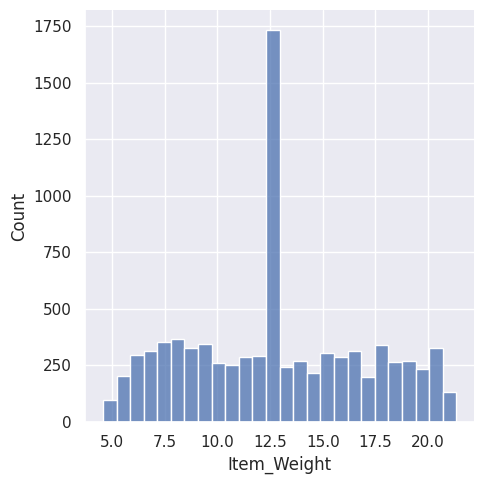

In [46]:
#numerical feature
sns.set() # it will give grids and the things
plt.figure(figsize=(6,6))
sns.displot(dataset['Item_Weight']) # this is for the the distribution of the various parameter in the graph
plt.show()


<Figure size 600x600 with 0 Axes>

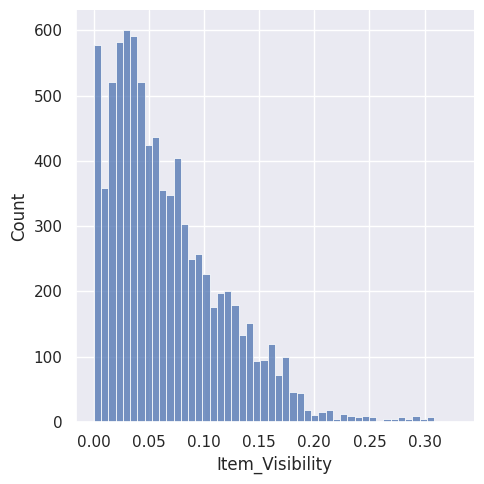

In [47]:
plt.figure(figsize=(6,6))
sns.displot(dataset['Item_Visibility'])
plt.show()

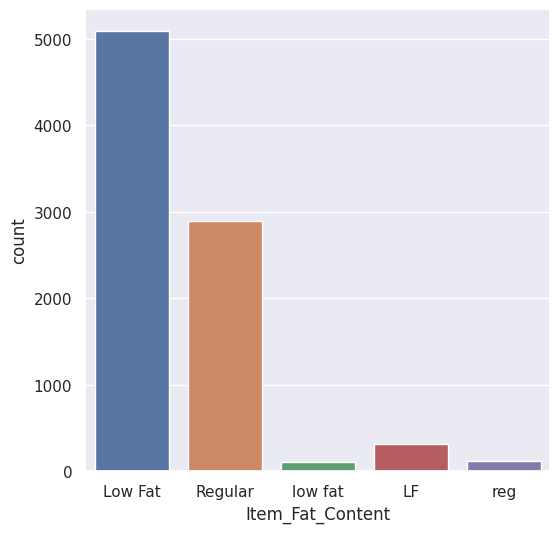

In [48]:
#categorical features
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=dataset)
plt.show()


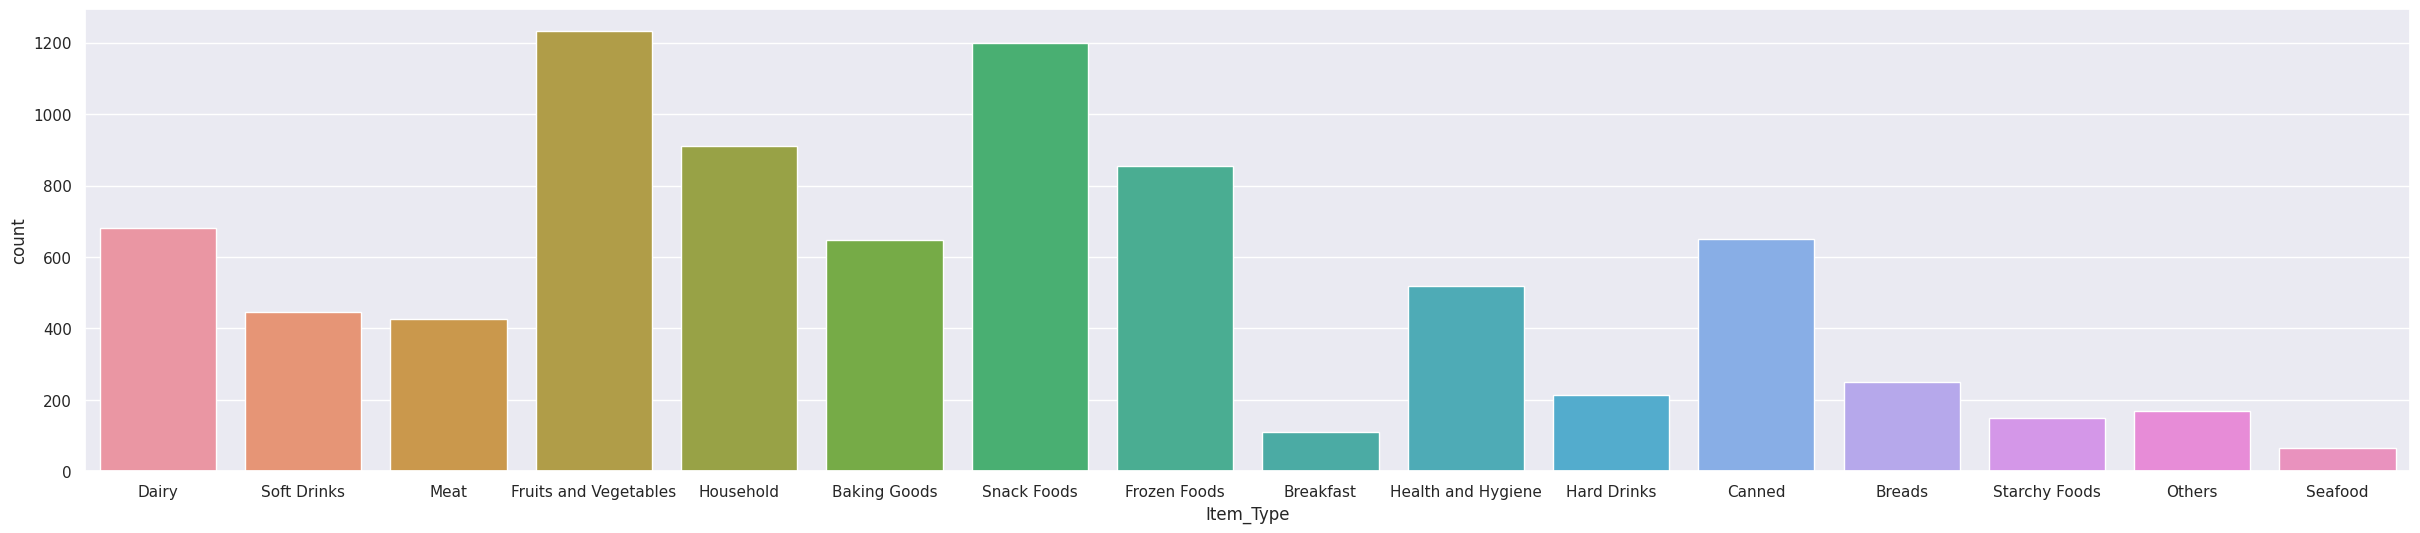

In [49]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=dataset)
plt.show()


In [50]:
dataset['Item_Fat_Content'].value_counts()
dataset.replace({'Item_Fat_Content': {'low fat': 'Low Fat' ,'LF': 'Low Fat' ,'reg' : 'Regular'}},inplace=True)


In [51]:
encoder=LabelEncoder()

In [115]:
dataset['Outlet_Size'] = dataset['Outlet_Size'].astype(str)

In [121]:
dataset['Outlet_Size'] = encoder.fit_transform(dataset['Outlet_Size'])

In [122]:
print(dataset['Outlet_Size'])
dataset.isnull().sum()


0       1
1       1
2       1
3       2
4       0
       ..
8518    0
8519    2
8520    3
8521    1
8522    3
Name: Outlet_Size, Length: 8523, dtype: int64


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [123]:

dataset['Item_Identifier']=encoder.fit_transform(dataset['Item_Identifier'].values)
dataset['Item_Fat_Content']=encoder.fit_transform(dataset['Item_Fat_Content'].values)
dataset['Item_Type']=encoder.fit_transform(dataset['Item_Type'].values)
dataset['Outlet_Size']=encoder.fit_transform(dataset['Outlet_Size'])

dataset['Outlet_Location_Type']=encoder.fit_transform(dataset['Outlet_Location_Type'].values)
dataset['Outlet_Type']=encoder.fit_transform(dataset['Outlet_Type'].values)
dataset['Outlet_Identifier']=encoder.fit_transform(dataset['Outlet_Identifier'].values)

In [89]:
dataset.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.733779,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.987183,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.964800


In [124]:
#splitting features and target


In [125]:
X=dataset.drop(columns='Item_Outlet_Sales',axis=1)


In [126]:
Y=dataset['Item_Outlet_Sales']

In [127]:

print(X.shape,X_Train.shape,X_Test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [128]:
#splitting data into training and testing data
X_Train,X_Test,Y_Test,Y_Train=train_test_split(X,Y,test_size=.2 ,random_state=2)

In [129]:
print(X.shape,X_Train.shape,X_Test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [136]:
xgboost=XGBRegressor()

In [141]:
# Create an instance of the XGBRegressor class.
xgb_model = XGBRegressor()
X_Train = X_Train[:len(Y_Train)]
# Fit the model to the training data.
xgb_model.fit(X_Train, Y_Train)

# Make predictions on the test data.
y_pred = xgb_model.predict(X_Test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

TypeError: ignored